This Notebook benchmarks read/write speeds for Arrow and Pandas.
It is run on a ```Intel(R) Xeon(R) CPU E5-1650 v3 @ 3.50GHz``` / ```128GB RAM``` server with ```Ubuntu 22.04.1 LTS```.

NOTE: Here we aren't accounting for the significantly faster arrow batch reading functions.

# **Visualized Results @ end of notebook**

In [1]:
import lib.io_ as io
import pandas as pd
from time import monotonic

# READ TIME

In [2]:
%%time
start_pandas_read = monotonic()
df = io.load_path_pandas('/data/mlhd-zstd/d3/d38db397-d7b6-47fd-b57b-d2ba0001374e.csv.zst')
end_pandas_read = monotonic()

CPU times: user 59.9 ms, sys: 12.2 ms, total: 72.1 ms
Wall time: 128 ms


In [3]:
%%time
start_arrow_read = monotonic()
df_arrow = io.load_path('/data/mlhd-zstd/d3/d38db397-d7b6-47fd-b57b-d2ba0001374e.csv.zst')
end_arrow_read = monotonic()

CPU times: user 57.4 ms, sys: 21.3 ms, total: 78.7 ms
Wall time: 36.5 ms


In [4]:
%%time
start_pandas_batch_read = monotonic()
df_load_path_file = io.load_path_file_pandas('/home/snaek/MLHD/warehouse/samples/random_file_paths.txt')
end_pandas_batch_read = monotonic()

CPU times: user 4.06 s, sys: 457 ms, total: 4.52 s
Wall time: 7.31 s


In [5]:
%%time
start_arrow_batch_read = monotonic()
df_load_path_file_arrow = io.load_path_file('/home/snaek/MLHD/warehouse/samples/random_file_paths.txt')
end_arrow_batch_read = monotonic()

CPU times: user 4.28 s, sys: 451 ms, total: 4.73 s
Wall time: 2.84 s


# WRITE TIME

In [6]:
## Setting Up config
import config
ENV = {name: values for name, values in vars(config).items() if not name.startswith("__")}

paths = io.generate_paths(ENV['MLHD_ROOT'])

df = io.load_path(paths[50])
df

,timestamp,artist_MBID,release_MBID,recording_MBID
0,1252134466,084308bd-1654-436f-ba03-df6697104e19,73073de8-e725-3a49-8e79-35dd5ef29b98,3b251004-2ce3-47be-b238-bd436157b417
1,1252134833,d02408f2-bf08-4246-8c91-5d5427ee9779,NaN,NaN
2,1252135049,29a24426-9888-4f8d-8cd8-ccd2c693a2bb,NaN,NaN
3,1252135298,183e636e-d41c-43fe-a428-8a034eb20c7b,NaN,98fde7e4-dea1-4841-aff5-addf3fac402b
4,1252135520,9df8afd8-eec6-4bcc-a7e3-ebc0265331ec,NaN,NaN
...,...,...,...,...
68432,1362903803,183e636e-d41c-43fe-a428-8a034eb20c7b,239f682c-0c16-3941-b35e-10ac11ba65f9,0025d84d-54b7-458b-aa79-69041449c274
68433,1362960780,0307edfc-437c-4b48-8700-80680e66a228,NaN,0c25ca58-dc83-4b1d-af9d-6836188cd9ea
68434,1362961027,d4732838-5baa-4d62-b7ce-8bcee6c68404,bad7b046-02dc-4978-99ac-ba193384791d,698e0cc5-a0d8-48be-ab86-a0a272a19b2f
68435,1362961475,144ef525-85e9-40c3-8335-02c32d0861f3,44c90aa3-3228-4d14-99e2-1f367e54b0b2,062441be-f803-4ade-8766-c68af8f70455


In [7]:
%%time
start_write_pandas = monotonic()
io.write_frame_pandas(df, original_path = paths[50]+'_pandas')
end_write_pandas = monotonic()

CPU times: user 415 ms, sys: 12.3 ms, total: 427 ms
Wall time: 442 ms


In [8]:
%%time
start_write_arrow = monotonic()
io.write_frame(df, original_path = paths[50]+'_arrow')
end_write_arrow = monotonic() 

CPU times: user 47.8 ms, sys: 7.97 ms, total: 55.8 ms
Wall time: 52.6 ms


# VISUALIZATIONS

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
labels = [
    'READ', 
    'BATCH_READ', 
    'WRITE']

pandas_times = [
    round(end_pandas_read - start_pandas_read, 3),
    round(end_pandas_batch_read - start_pandas_batch_read, 3),
    round(end_write_pandas - start_write_pandas, 3)
    ]

arrow_times = [
    round(end_arrow_read - start_arrow_read, 3),
    round(end_arrow_batch_read - start_arrow_batch_read, 3),
    round(end_write_arrow - start_write_arrow, 3)
    ]

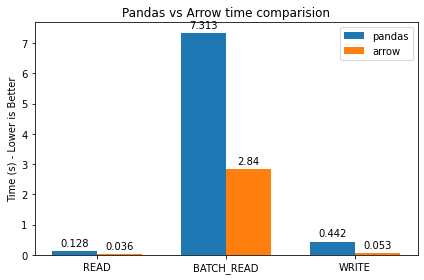

In [11]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pandas_times, width, label='pandas')
rects2 = ax.bar(x + width/2, arrow_times, width, label='arrow')

ax.set_ylabel('Time (s) - Lower is Better')
ax.set_title('Operation')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.title('Pandas vs Arrow time comparision')
plt.show()

<Figure size 432x288 with 0 Axes>

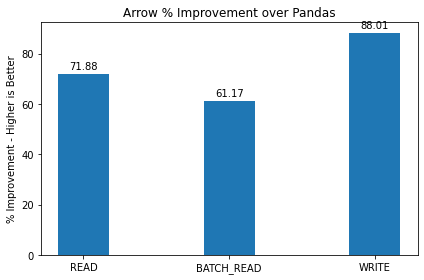

In [12]:
plt.figure()

improvement_calculator = lambda x, y: round((x - y) / x * 100, 2)
percent_improvements = [(improvement_calculator(x, y)) for x, y in zip(pandas_times, arrow_times)]
labels = ['READ', 'BATCH_READ', 'WRITE']

fig, ax = plt.subplots()
rects = ax.bar(x, percent_improvements, width)

ax.set_ylabel('% Improvement - Higher is Better')
ax.set_title('Operation')
ax.set_xticks(x, labels)

ax.bar_label(rects, padding=3)

fig.tight_layout()

plt.title('Arrow % Improvement over Pandas')
plt.show()

# Without Compression

In [13]:
import os
import pandas as pd
import lib.mb as mb
import lib.load as load
import time
import config
from pyarrow import parquet as pq, Table as pt
from pyarrow import _csv as csv
from pyarrow import dataset as dataset
from pyarrow import Table as Table
from pyarrow import CompressedOutputStream as COS

TEST_ROOT = os.path.join("/dev/shm/", "tests/")
os.makedirs(TEST_ROOT, exist_ok=True)

In [14]:
with open(
    os.path.join(config.SAMPLE_ROOT, 'random_file_paths.txt'), 'r') as f:
    paths = f.readlines()

paths = [path.strip() for path in paths]

In [15]:
%%time
files_dict = {}

start_load = time.monotonic()
for i, path in enumerate(paths):
    files_dict[i] = pd.read_csv(path, sep='\t')
end_load = time.monotonic()

load_time = round(end_load - start_load, 2)
load_time

CPU times: user 3.28 s, sys: 58.1 ms, total: 3.34 s
Wall time: 3.34 s


3.34

In [16]:
### Writing to CSV without compression

In [17]:
%%time
## With pandas
# writing files in CSV w/ no compression

csv_paths = []
os.makedirs(
    os.path.join(TEST_ROOT, "csv/"),
    exist_ok=True)

csv_write_start = time.monotonic()
for n, file in enumerate(paths):
    df = pd.read_csv(file, sep='\t')
    path =  os.path.join(TEST_ROOT, f"csv/{n}.csv.zst")
    csv_paths.append(path)
    
    df.to_csv(path, compression=None)

csv_write_end = time.monotonic()
csv_write_time = round(csv_write_end - csv_write_start, 2)
csv_write_time

CPU times: user 15.7 s, sys: 257 ms, total: 15.9 s
Wall time: 15.9 s


15.93

In [18]:
%%time
## With pandas
# writing files in CSV w/ no compression

csv_paths = []
os.makedirs(
    os.path.join(TEST_ROOT, "csv/"),
    exist_ok=True)

csv_write_start = time.monotonic()
for n, file in enumerate(paths):
    df = pd.read_csv(file, sep='\t')
    path =  os.path.join(TEST_ROOT, f"csv/{n}.csv.zst")
    csv_paths.append(path)
    
    df.to_csv(path, compression=None)

csv_write_end = time.monotonic()
csv_write_time = round(csv_write_end - csv_write_start, 2)
csv_write_time

CPU times: user 15.5 s, sys: 278 ms, total: 15.8 s
Wall time: 15.8 s


15.81

In [19]:
write_options  = csv.WriteOptions(
    include_header = False,
    delimiter = '\t',
)

def write_frame(df_input, original_path):
    """
    Function to write a dataframe to a csv file using pyarrow
    """
    # Replace MLHD_ROOT with path to new MLHD folder.
    write_path = original_path.replace(ENV["MLHD_ROOT"], ENV["WRITE_ROOT"])
    write_path = write_path.replace('txt.gz', 'csv.zst')
    
    # print(write_path)
    # Make directory inside WRITE_ROOT if it doesn't exist
    os.makedirs(os.path.dirname(write_path), exist_ok=True)
    
    df_input = Table.from_pandas(df_input)
    # csv.write_csv(df_input, output_file = write_path, write_options = )
    with COS(write_path, "zstd") as out:
        csv.write_csv(df_input, out, write_options = write_options)

    df_input